In [2]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy, umath
import ldd
import statistics

42 42
8.7


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


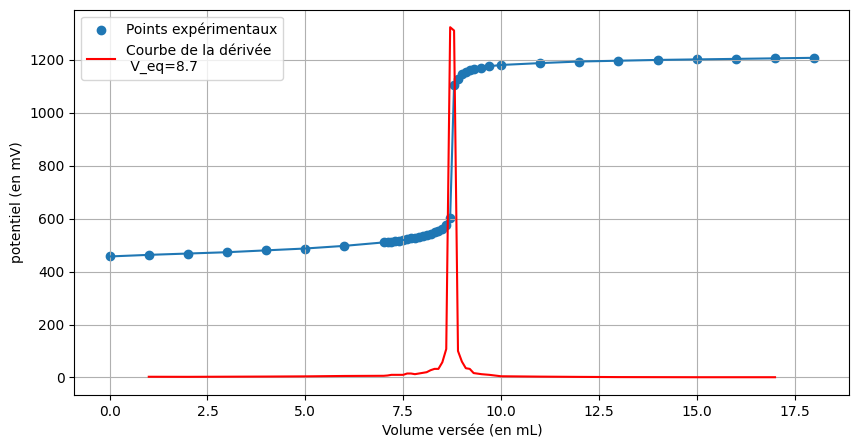

In [11]:
fig=plt.figure(figsize=[10,5])
V_titrage=np.array([0,1,2,3,4,5,6,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.5,9.7,10,11,12,13,14,15,16,17,18]) #volume versé en ml
conductimetrie=np.array([457,463,468,473,480,487,497,510,511,513,515,517,519,521,525,527,530,533,537,541,548,554,561,577,604,1106,1128,1146,1152,1160,1165,1170,1175,1180,1187,1193,1196,1199,1201,1203,1205,1207]) #grandeur mesuré pour le titrage

Vol_derivee=[] #nouvel liste pour la dérivée
conduct_derivee=[] #liste dérivée
print(len(V_titrage),len(conductimetrie))

for i in range(1,len(V_titrage)-1):
    conduct_derivee.append((conductimetrie[i+1]-conductimetrie[i-1])/(V_titrage[i+1]-V_titrage[i-1])) #On calcule la dérivée en prenant le point après et le point avant et on calcule la pente
    Vol_derivee.append(V_titrage[i])

max_derivee=np.max(conduct_derivee)
max_index=conduct_derivee.index(max_derivee) #trouve l'indice pour le max de la dérivée
V_max=Vol_derivee[max_index] #trouve le volume pour laquelle la dérivée est max
print(V_max) 

conduct_derivee=np.array(conduct_derivee)

plt.plot(V_titrage,conductimetrie)
plt.scatter(V_titrage,conductimetrie,label="Points expérimentaux") #trace les points expérimentaux

plt.plot(Vol_derivee,conduct_derivee/2,c='r',label=f"Courbe de la dérivée \n V_eq={V_max}") #trace la dérivée et affiche le volume équivalent

plt.ylabel('potentiel (en mV)')
plt.xlabel('Volume versée (en mL)')
plt.grid()
plt.legend()
plt.savefig("Titrage_FerII.eps",format='eps') #sauvegarde la figure, on peut mettre .png au lieu de .eps et format="png"
plt.show()

